<a id="toc"></a>

## <p style="background-color:#4F8C9D; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Data Cleaning and Modeling with Diamonds Dataset</p>

* In this study, I wanted to analyse the effect of carat column on price in Seaborn "Diamonds" dataset with simple linear regression. 

* In the first step, I first tried to find outlier values and get rid of them. For this, I first used Tukey's Rule, but I did not get a very successful result. 

* Then, I tried to get rid of the outlier data using the Winsorizing method, but this did not give the result I expected. 

* Finally, I used the log() method and got more meaningful results than the other two. I cleaned the outlier values with this method. I investigated the correlation values of these two columns and created a dataframe from these two columns for simple linear regression. 

* I analysed the predictions of the model using the least squares error method.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


info about dataset

+ carat :Carat weight of the diamond
+ depth % :The height of a diamond, measured from the culet to the table, divided by its average   girdle diameter
+ table % :The width of the diamond's table expressed as a percentage of its average diameter
+ price :the price of the diamond
+ x :length mm
+ y :width mm
+ z :higth mm


In [6]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
z,53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


In [9]:
df.price.corr(df["table"])

0.127133902121742

In [10]:
df.price.corr(df["depth"])

-0.010647404584142976

In [11]:
df.price.corr(df["carat"])

0.921591301193476

In [12]:
df.price.corr(df["x"])

0.884435161016128

In [13]:
# df = df[["carat", "price"]]
# df

## Detecting Outliers with Graphs

<AxesSubplot:xlabel='carat'>

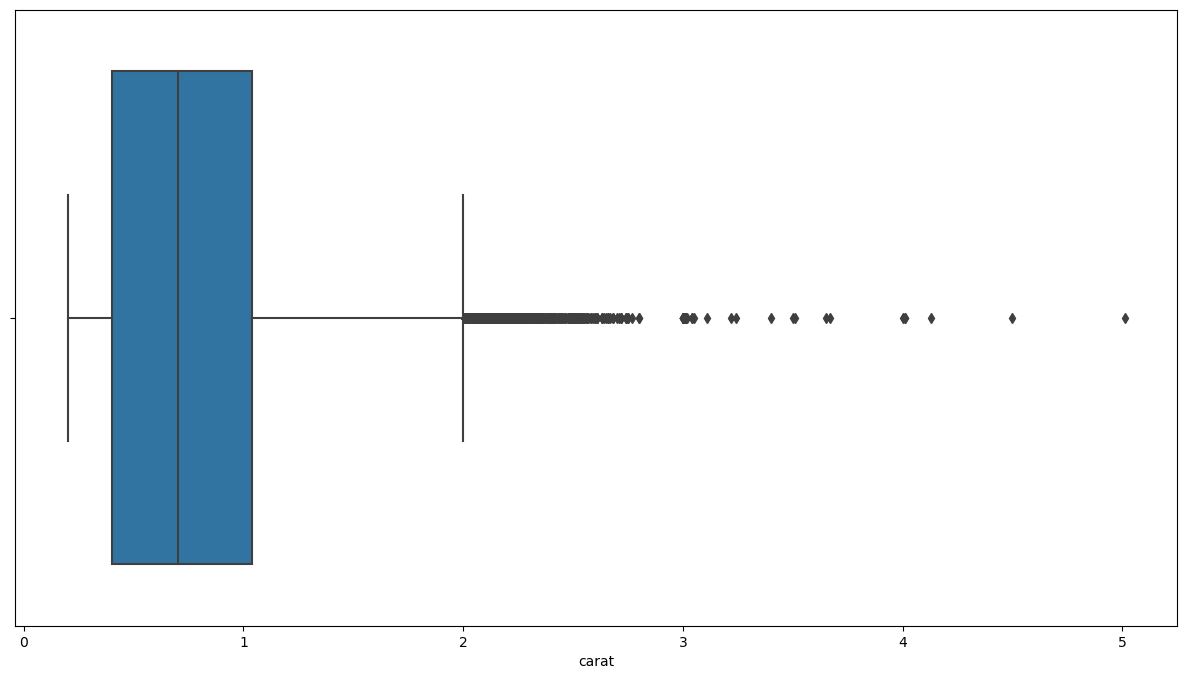

In [14]:
plt.figure(figsize = (15,8))
sns.boxplot(x = df["carat"])

<AxesSubplot:xlabel='x'>

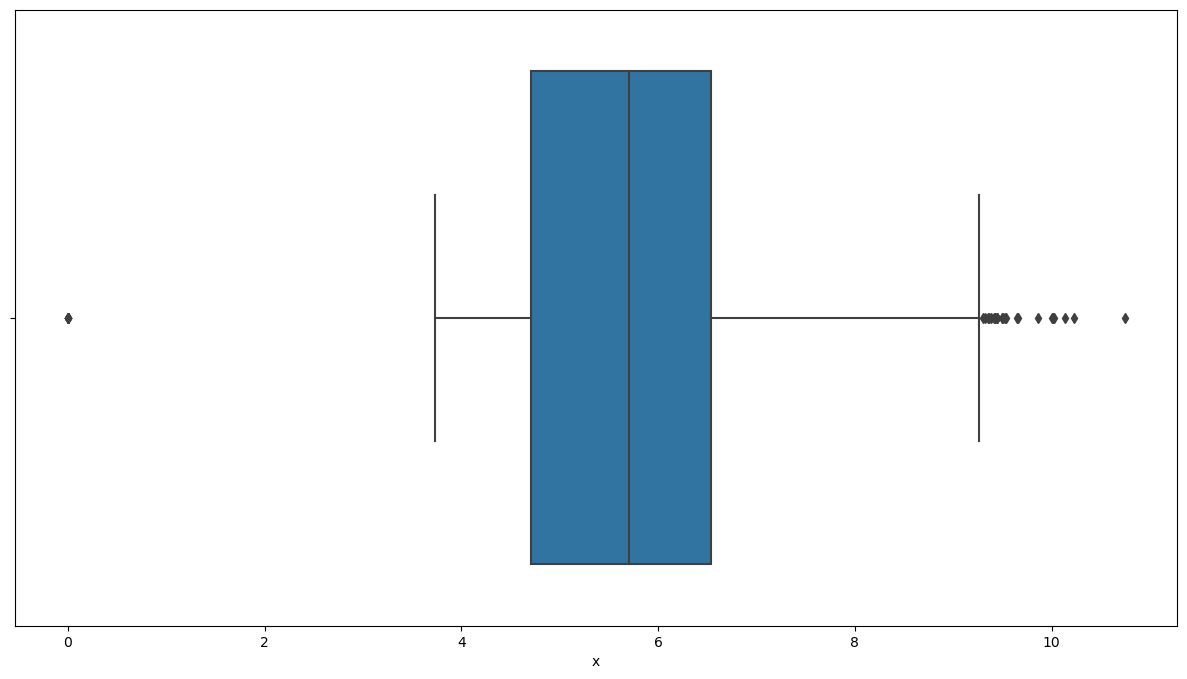

In [15]:
plt.figure(figsize = (15,8))
sns.boxplot(x = df["x"])

<Figure size 1500x800 with 0 Axes>

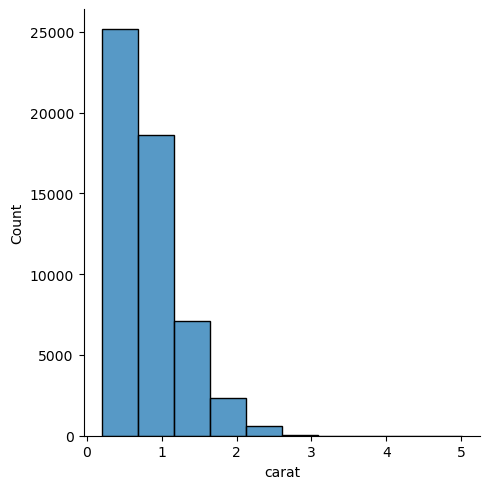

In [16]:
plt.figure(figsize = (15, 8))
sns.displot(df.carat, bins = 10, kde = False)

<AxesSubplot:xlabel='price'>

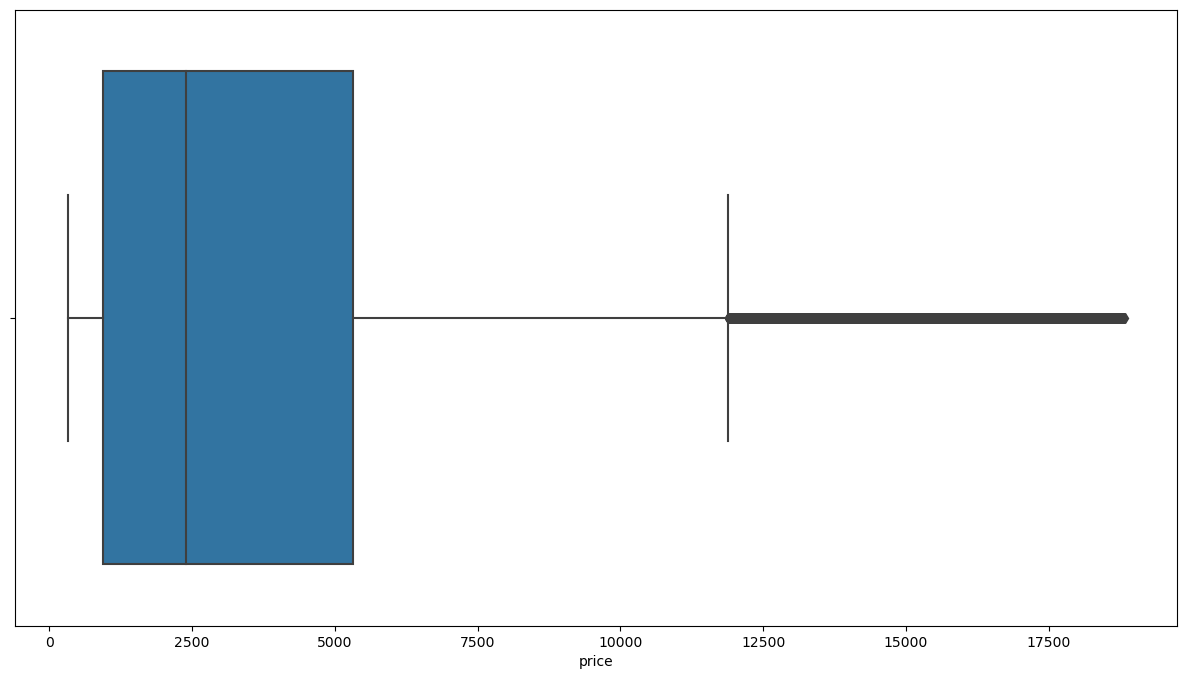

In [17]:
plt.figure(figsize = (15,8))
sns.boxplot(x = df["price"])

<Figure size 1500x800 with 0 Axes>

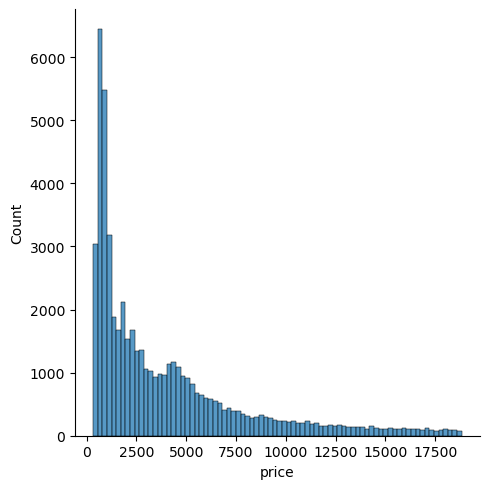

In [18]:
plt.figure(figsize= (15,8))
sns.displot(x = df.price)

In [19]:
df.carat.sort_values(ascending=True)

31593    0.20
31597    0.20
31596    0.20
31595    0.20
31594    0.20
         ... 
25999    4.01
25998    4.01
27130    4.13
27630    4.50
27415    5.01
Name: carat, Length: 53940, dtype: float64

In [20]:
df.carat.sort_values(ascending = True).tail(10)

24328    3.50
27679    3.51
23644    3.65
26534    3.67
26444    4.00
25999    4.01
25998    4.01
27130    4.13
27630    4.50
27415    5.01
Name: carat, dtype: float64

In [21]:
df.price.sort_values(ascending=True)

0          326
1          326
2          327
3          334
4          335
         ...  
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, Length: 53940, dtype: int64

In [22]:
df.price.sort_values(ascending=True).tail(10)

27740    18791
27741    18791
27742    18795
27743    18795
27744    18797
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, dtype: int64

In [23]:
# Let us take the indexes of these extreme values 

df.carat.sort_values(ascending=True).tail(10).index

Int64Index([24328, 27679, 23644, 26534, 26444, 25999, 25998, 27130, 27630,
            27415],
           dtype='int64')

In [24]:
# Let us assign the indexes of these extreme values to an object 

tail_index = df.carat.sort_values(ascending=True).tail(10).index
tail_index

Int64Index([24328, 27679, 23644, 26534, 26444, 25999, 25998, 27130, 27630,
            27415],
           dtype='int64')

In [25]:
# Let's make a more detailed analysis by calling the observations with these indexes as a dataframe.

df.loc[tail_index]

,carat,cut,color,clarity,depth,table,price,x,y,z
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


For example; When we compare the observation at the index number 27415 with other observations, we see that the values in the columns, particularly "table" and "price" ones, are compatible with each other. Therefore, we can assume that the values about this observation are not faulty and this value can be assessed as an extreme value rather than an outlier.

## Detecting Outliers with Tukey's Fences | Tukey's Rule
Once potential outliers have been identified, you need to decide how best to address them. There is no single best practice for determining what to do. Potential outliers provide a starting point for further investigation.

There are many techniques for detecting outliers and no single approach can work for all cases. This part of our study describes an often useful approach based on the interquartile/Tukey fence method for outlier detection.

Other common methods for outlier detection are sensitive to extreme values and can perform poorly when applied to skewed distributions. The Tukey fence method is resistant to extreme values and applies to both normal and slightly skewed distributions.

In “Exploratory Data Analysis” by John W. Tukey (1977), a multiplier of 1.5 was proposed for labeling outliers. Tukey's rule says that the outliers are values more than 1.5 times the interquartile range from the quartiles — either below Q1 − 1.5IQR, or above Q3 + 1.5IQR.

https://towardsdatascience.com/practical-guide-to-outlier-detection-methods-6b9f947a161e

https://en.wikipedia.org/wiki/Interquartile_range

In descriptive statistics, the interquartile range is a measure of statistical dispersion, which is the spread of the data. It tells you the spread of the middle half of your distribution. Quartiles segment any distribution that's ordered from low to high into four equal parts. The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set.

In [26]:
#  First way of specifying Q1 & Q3 is using the .quantile() method

Q1 = df["carat"].quantile(0.25)
Q3 = df["carat"].quantile(0.75)

IQR = Q3 - Q1

In [27]:
IQR

0.64

In [28]:
#  Second way of specifying Q1 & Q3 is using the .describe() method

df.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [29]:
Q1 = df.carat.describe().loc["25%"]
Q3 = df.carat.describe().loc["75%"]
IQR = Q3 - Q1
IQR

0.64

In [30]:
##  Third way of specifying IQR is using the scipy.stats.iqr method

from scipy import stats

IQR = stats.iqr(df.carat)
IQR

0.64

In [31]:
lower_lim = Q1 - 1.5 * IQR # we defined the lower limit creteria
upper_lim = Q3 + 1.5 * IQR # we defined the upper limit creteria

In [32]:
lower_lim

-0.5599999999999999

In [33]:
upper_lim

2.0

In [34]:
# Let's see how many total potential outliers there are

df.carat[(df.carat < lower_lim) | (df.carat > upper_lim)].count()

1889

In [35]:
df.carat.min()

0.2

In [36]:
# First way how many observations not defined as outliers we have

df.carat[~((df.carat < lower_lim) | (df.carat > upper_lim))].count()

52051

In [37]:
# Second way how many observations not defined as outliers we have

df.carat[(df.carat >= lower_lim) & (df.carat <= upper_lim)].count()

52051

# Removing the Outliers

In [38]:
# The First Approach:

# Let's assign the observations in the "carat" column and not defined as outliers to
# an object named "not_outliers"

not_outliers = (df.carat >= lower_lim) & (df.carat <= upper_lim)
not_outliers

0        True
1        True
2        True
3        True
4        True
         ... 
53935    True
53936    True
53937    True
53938    True
53939    True
Name: carat, Length: 53940, dtype: bool

In [39]:
# Let's create a DataFrame from the observations not defined as outliers named "cleaned_df"

cleaned_df = df[not_outliers]
cleaned_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [40]:
# The Second Approach:

# Let's find the index numbers of the observations defined as outliers 


df.loc[(df.carat < lower_lim) | (df.carat > upper_lim)].index

Int64Index([12246, 13002, 13118, 13757, 13991, 13992, 14138, 14912, 14913,
            15151,
            ...
            27734, 27736, 27737, 27738, 27739, 27741, 27742, 27744, 27746,
            27749],
           dtype='int64', length=1889)

In [41]:
# Let us assign the index numbers of the observations defined as outliers to 
# an object named "outlier_index"

outlier_index = df.loc[(df.carat < lower_lim) | (df.carat > upper_lim) ].index
outlier_index

Int64Index([12246, 13002, 13118, 13757, 13991, 13992, 14138, 14912, 14913,
            15151,
            ...
            27734, 27736, 27737, 27738, 27739, 27741, 27742, 27744, 27746,
            27749],
           dtype='int64', length=1889)

In [42]:
# It's time to drop the index numbers of the observations defined as outliers from the 
# original DataFrame. 
# As such, the remaining observations not defined as outliers in the original df will 
# create a new DatFrame

df.drop(outlier_index)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [43]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [44]:
cleaned_df.describe()

,carat,depth,table,price,x,y,z
count,52051.000000,52051.000000,52051.000000,52051.000000,52051.000000,52051.000000,52051.000000
mean,0.748738,61.748679,57.426274,3532.925496,5.639300,5.643634,3.482717
std,0.402096,1.418252,2.223445,3414.985354,1.028895,1.054333,0.649709
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.390000,61.100000,56.000000,928.000000,4.690000,4.700000,2.890000
50%,0.700000,61.800000,57.000000,2289.000000,5.650000,5.660000,3.490000
75%,1.020000,62.500000,59.000000,4958.000000,6.480000,6.470000,4.010000
max,2.000000,79.000000,79.000000,18818.000000,8.420000,58.900000,31.800000


<AxesSubplot:>

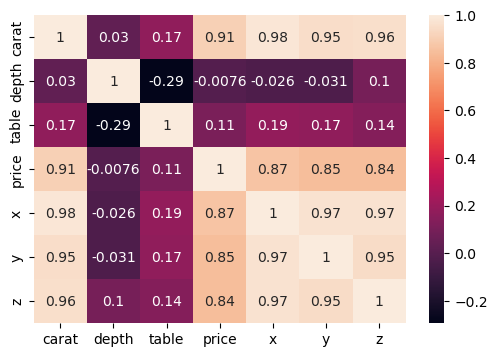

In [45]:
sns.heatmap(cleaned_df.corr(), annot = True)

In [46]:
sns.heatmap(original_df.corr(), annot = True)

NameError: name 'original_df' is not defined

In [ ]:
original_df = df.copy()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

g = sns.boxplot(x = "carat",
                data = original_df,
                color = "red",
                ax = ax[0])

h = sns.boxplot(x = "carat",
                data = cleaned_df,
                color = "skyblue",
                ax = ax[1])

ax[0].set(xlabel = " 'carat' Future from Original DataFrame")
ax[1].set(xlabel = " 'carat' Future from Cleaned DataFrame")

g.set_title("Distribution WITH Outlier")
h.set_title("Distribution WITHOUT Outlier");

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

g = sns.histplot(original_df.carat, 
                 bins = 10, 
                 kde = False, 
                 color = "red", 
                 label = "With Outliers", 
                 ax = ax[0])

h = sns.histplot(cleaned_df.carat,
                 bins = 10,
                 kde = False,
                 color = "skyblue",
                 label = "Without Outliers",
                 ax = ax[1])

ax[0].set(xlabel = " 'carat' Future from Original DataFrame")
ax[1].set(xlabel = " 'carat' Future from Cleaned DataFrame")

g.set_title("Distribution WITH Outlier")
h.set_title("Distribution WITHOUT Outlier");

In [ ]:
cleaned_df.carat.describe()

In [ ]:
original_df.carat.describe()

In [ ]:
# Let us compare the descriptive statistics summary of  both DataFrames:

# The First Approach to Create DataFrame:

compare = pd.DataFrame(original_df.carat.describe().values, 
                       index = original_df.table.describe().index,
                      columns = ["Original DataFrame"])

compare["Cleaned DataFrame"] = cleaned_df.carat.describe().values

compare

In [ ]:
# The Second Approach to Create DataFrame:

pd.DataFrame([df.carat.describe(), cleaned_df.carat.describe()], index = ["original", "drop"]).T

## Limitation & Transformation of the Outliers

### Limitation using .winsorize() method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively Source 01 & Source 02.

Cautions on Winsorizing Data

Here are a few things to keep in mind when deciding to winsorize data:

If there aren’t extreme outliers, then winsorizing the data will only modify the smallest and largest values slightly. This is generally not a good idea since it means we’re just modifying data values for the sake of modifications.
Outliers can represent interesting edge cases in the data. Thus, before modifying outliers it’s a good idea to take a closer look at them to see what could have caused them.
You should decide whether or not to winsorize data after collecting the data, not before. You should see if there actually are extreme outliers before you decide to perform winsorization. If no extreme outliers are present, winsorization may be unnecessary.

Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. The mean value calculated after such replacement of the extreme values is called winsorized mean.

For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile.

In [ ]:
# We first need to import winsorize function from mstats package of stats module 
# of scipy which is a scientific computation library

from scipy.stats.mstats import winsorize

In [ ]:
# let's first remember our DataFrame containing the extreme values

df

In [ ]:
# As we did above we will focus on "carat" feature again:

pd.DataFrame(df.carat.value_counts().sort_index())

###### Let us first define and use hypothetical proportions for the lowest and highest values for getting to know how winsorize() method works:

In [ ]:
winsorized_carat = winsorize(df.carat, limits=[0.01, 0.05])

winsorized_carat = pd.DataFrame(winsorized_carat, columns = ["winsorized_carat"])
winsorized_carat = pd.DataFrame(winsorized_carat.winsorized_carat.value_counts().sort_index())
display(winsorized_carat)
pd.DataFrame(df.carat.value_counts().sort_index())

### Let us make a more professional approach for calculating the lowest and highest limits:

In [ ]:
display(lower_lim, len(df.carat [df.carat < lower_lim]), len(df))

# Let's find the proportion of values less than lower limit

a = len(df.carat[df.carat < lower_lim]) / len(df)
a

In [ ]:
display(upper_lim, len(df.carat [df.carat < upper_lim]), len(df))

# Let's find the proportion of values less than lower limit

b = len(df.carat[df.carat < upper_lim]) / len(df)
b

In [ ]:
# Now if I write the proportions, assigned to a and b, that I found in this winsorize, I can do a more logical job

carat_win = winsorize(df.carat, (a, b))
winsorized_carat = pd.DataFrame(carat_win, columns = ["winsorized_carat"])
winsorized_carat

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

g = sns.boxplot(data=original_df, x="carat", color="red", ax=ax[0]);
h = sns.boxplot(data=winsorized_carat, x="winsorized_carat", color="skyblue", ax=ax[1])

ax[0].set(xlabel="'carat' Feature NOT Winsorized")
ax[1].set(xlabel="'carat' Feature Winsorized")

g.set_title('Distribution WITH Outliers')
h.set_title('Distribution WITHOUT Outliers');

# Having applied winsorized() method for handling outliers, no outliers left on the Boxplotchart as seen.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

g = sns.histplot(original_df.carat, bins=10, kde=False, color="red", label="With Outliers", ax=ax[0])
h = sns.histplot(winsorized_carat.winsorized_carat, bins=10, kde=False, color="skyblue", label="Without Outliers", ax=ax[1])

ax[0].set(xlabel="'carat' Feature NOT Winsorized")
ax[1].set(xlabel="'carat' Feature  Winsorized")

g.set(title="Distribution WITH Outliers")
h.set(title="Distribution WITHOUT Outliers");

In [ ]:
carat_win

In [ ]:
# Let us create a Series named "carat_win_ser"  from "carat_win" object

carat_win_ser = pd.Series(carat_win)
carat_win_ser

In [ ]:
pd.DataFrame([df.carat.describe(),
              cleaned_df.carat.describe(), 
              carat_win_ser.describe()], 
              index=['original', 'drop', 'winsorize']).T

In [ ]:
winsorized_carat.max()

In [ ]:
original = df.carat.sort_values().head(20).reset_index(drop=True)
winsorized = carat_win_ser.sort_values().head(20).reset_index(drop=True)

pd.DataFrame([original, winsorized]).T.rename(columns={"carat": "Original", "Unnamed 0": "Winzorized"})

## Let's check how many outliers were winsorized



In [ ]:
display(df.carat[df.carat < 0.4].count())
display(df.carat[df.carat == 0.4].count())

carat_win_ser[carat_win_ser == 0.4].count()

In [ ]:
Q3

In [ ]:
display(df.carat[df.carat >1.04].count())
display(df.carat[df.carat == 1.04].count())

carat_win_ser[carat_win_ser == 1.04].count()

# Transformation using log() method

* The Numpy.log() method lets you calculate the mathematical log of any number or array. The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

* The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x.

In [ ]:

# Let's remember our DataFrame:

df

#### This time "carat" featured will be handled regarding outliers.

In [ ]:
# It seems the "carat" feature has too many extreme values (outliers)

plt.figure(figsize=(10, 6))
sns.boxplot(x = df.carat)

In [ ]:
# Right skewed distribution occurs for "carat" feature since the long tail is on the right side of the distribution.

sns.histplot(df.carat, bins = 10, kde = False)

In [ ]:
# Let us examine what happens when np.log() method is applied 

np.log(df.carat)

In [ ]:
# We got the algorithm of all values in the "carat" column and examined the distribution of the observations with boxplot

plt.figure(figsize = (10, 6))
sns.boxplot(x = np.log(df.carat));

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(df.carat);

In [ ]:
# We got the algorithm of all values in the "carat" column and examined the distribution of the observations with histogram

sns.histplot(np.log(df.carat), bins = 10, kde= False)

In [ ]:
sns.histplot(df.carat, bins = 10, kde= False)

In [ ]:
# Let's create a new feature named "carat_log"

df["carat_log"] = np.log(df.carat)
df

In [ ]:
df

### Removing outliers after log() transformation
#### The first method to remove outliers

In [ ]:
df.carat_log.sort_values().tail()

In [ ]:
df.carat.sort_values().tail()

In [ ]:
# If we hypothetically defined the biggest two observation as outliers, we can pick 
# up their index numbers to remove from our DataFrame 
# En büyük iki gözlemi varsayımsal olarak aykırı değer olarak tanımlarsak, DataFrame'imizden kaldırmak
# için indeks numaralarını alabiliriz

drop_index = df.carat_log.sort_values().tail(2).index
drop_index

In [ ]:

# Let's remove these two observations at the index number 27630 and 27415 from our DataFrame

df.drop(drop_index)

### The second method to remove outliers

In [ ]:
# Again we can apply Tukey's Rule for defining and removing outliers from our DataFrame


Q1 = df.carat_log.quantile(0.25)
Q3 = df.carat_log.quantile(0.75)

IQR = Q3 - Q1
IQR

In [ ]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

lower_lim, upper_lim

In [ ]:
(df.carat_log > upper_lim).sum()

In [ ]:
(df.carat_log <= lower_lim).sum()

In [ ]:
# Let's see which observations are defined as outliers according to Tukey's Rule

df.loc[(df.carat_log > upper_lim)]

In [ ]:
# After defining the index numbers of these observation, we can remove them from our DataFrame

drop_index = df.loc[(df.carat_log > upper_lim)].index
drop_index

In [ ]:
df.drop(drop_index)

In [ ]:
df

### The third method to remove outliers

In [ ]:
# Here we can define the observations not defined as outliers and assign them to an object

not_outliers = (df.carat_log <= upper_lim)

In [ ]:
# let's examine how many observations are not defined as outliers

len(df[not_outliers])

In [ ]:
# We can create a new DatFrame containing only observations not defined as outliers

cleaned_df = df[not_outliers]
cleaned_df